Import libraries

In [1]:
import gym
import minihack

from RiccardoWorkSpace.StrategyLibrary2 import Strategy as Strategy
from JacopoWorkSpace.LibraryJacopo import Map
from SelormWorkSpace.MovingLibrary import Moving

import sys
sys.setrecursionlimit(200)

Creation level methods list

In [2]:
def CreateLevel1():

    new_level = minihack.LevelGenerator(w = 11, h = 11)
    new_level.set_start_pos((5, 5))

    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 1, x2 = 4, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 1, x2 = 9, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 6, x2 = 4, y2 = 9)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 6, x2 = 9, y2 = 9)

    new_level.fill_terrain(type='fillrect',flag='.', x1 = 2, y1 = 2, x2 = 8, y2 = 8)

    new_level.add_monster(name='coyote',symbol='d', place=(0,0))
    # new_level.add_monster(name='wolf',symbol='d', place=(10,10))
    
    Enviroment = gym.make("MiniHack-Skill-Custom-v0", des_file = new_level.get_des(), observation_keys=("chars", "pixel"))

    state = Enviroment.reset()

    MapGame = Map(state)
    MapGame.view_map()
    
    return MapGame, Enviroment

Choose level get the map and create joystick

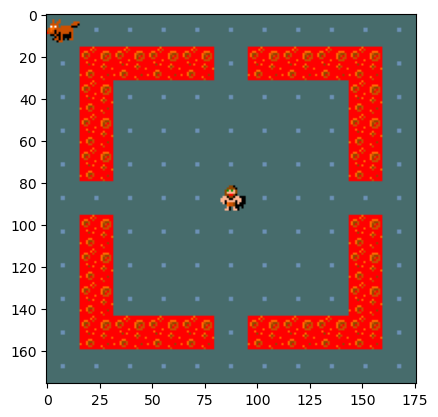

In [3]:
MapGame, Enviroment = CreateLevel1()
Joystick = Moving(Enviroment)

Create joystick, stategy and successor function

In [4]:
def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) in [".","d","@"], Result))

StrategyLogic = Strategy(SuccessorFunction)
StrategyLogic.ActualGoal = (5, 34)  #<--------- Target

Go to next step

In [1]:
import RiccardoWorkSpace.functions as FUN
i = 0

CharacterPosition = MapGame.get_player_location()
MonsterPositions = MapGame.get_monsters_location()

while(1):
    

    if CharacterPosition==StrategyLogic.ActualGoal:
        print("Target reached!")
        break

    else:
        path = StrategyLogic.Safety_first(CharacterPosition, 45, MonsterPositions, "v2", i)

        print("Path chosen", StrategyLogic.GetActualPath())
        print("Path that I will do for now:", path)
        for nextstep in path[1:]:
            print(f"{CharacterPosition} --> {nextstep}")
            NewState = Joystick.Move(CharacterPosition, nextstep)
            MapGame = Map(NewState)
            MapGame.view_map()
            CharacterPosition = MapGame.get_player_location()
            MonsterPositions = MapGame.get_monsters_location()
    i += 1

NameError: name 'MapGame' is not defined

The 5 best paths calculated by strategy v2 are:
[(10, 39), (9, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(10, 39), (9, 38), (8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 5
[(10, 39), (9, 38), (10, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(10, 39), (9, 38), (10, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(10, 39), (9, 38), (10, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
Actual path choosed: [(10, 39), (9, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)]
(10, 39) --> (9, 38)


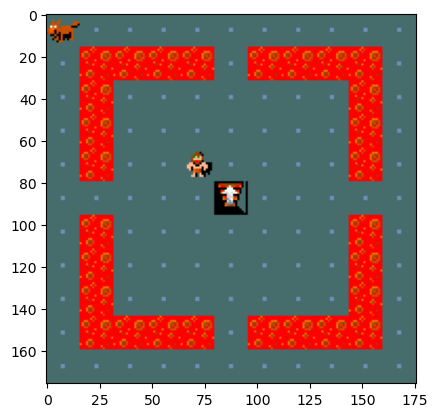

The 5 best paths calculated by strategy v2 are:
[(9, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(9, 38), (8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 5
[(9, 38), (10, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(9, 38), (10, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
[(9, 38), (10, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 5
Actual path choosed: [(9, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)]
(9, 38) --> (8, 37)


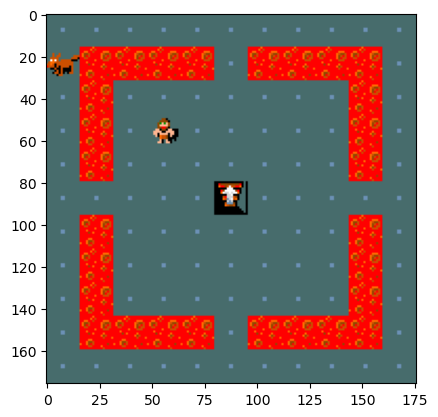

The 5 best paths calculated by strategy v2 are:
[(8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 4
[(8, 37), (8, 36), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 4
[(8, 37), (9, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 4
[(8, 37), (9, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 4
[(8, 37), (7, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 5
Actual path choosed: [(8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
(8, 37) --> (7, 38)


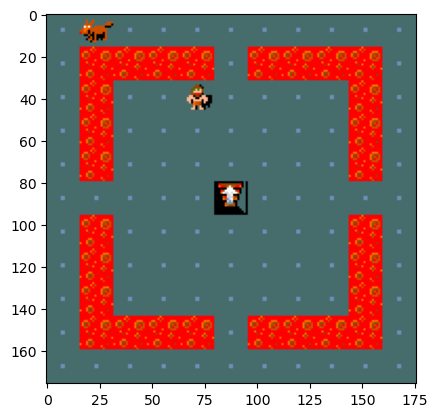

The 5 best paths calculated by strategy v2 are:
[(7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 3
[(7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (6, 34), (5, 34)] 4
[(7, 38), (8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 4
[(7, 38), (7, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 4
[(7, 38), (8, 38), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 4
Actual path choosed: [(7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
(7, 38) --> (6, 39)


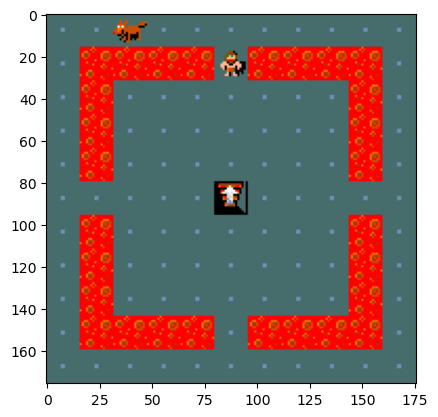

The 5 best paths calculated by strategy v2 are:
[(6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 2
[(6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (6, 34), (5, 34)] 3
[(6, 39), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 3
[(6, 39), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 3
[(6, 39), (5, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 3
Actual path choosed: [(6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
(6, 39) --> (5, 38)


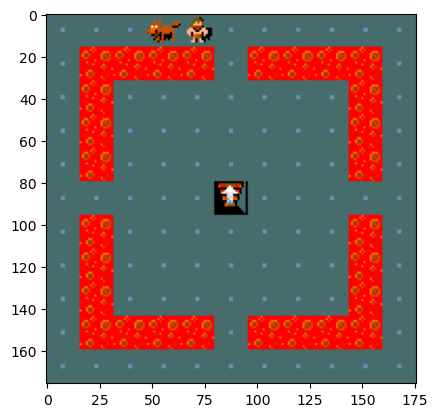

The 5 best paths calculated by strategy v2 are:
[(5, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 2
[(5, 38), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 2
[(5, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (6, 34), (5, 34)] 3
[(5, 38), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35), (6, 34), (5, 34)] 3
Actual path choosed: [(5, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
(5, 38) --> (6, 39)


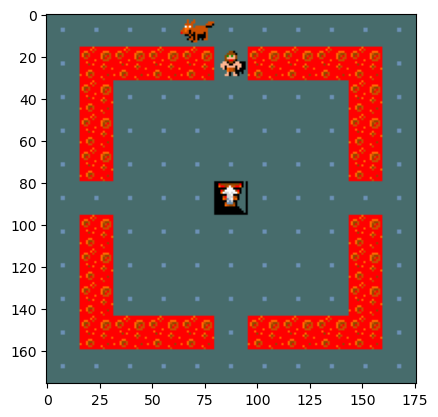

The 5 best paths calculated by strategy v2 are:
[(6, 39), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 19
[(6, 39), (7, 39), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 19
[(6, 39), (5, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 19
[(6, 39), (5, 40), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 19
[(6, 39), (7, 40), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 19
Actual path choosed: [(6, 39), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
(6, 39) --> (7, 38)


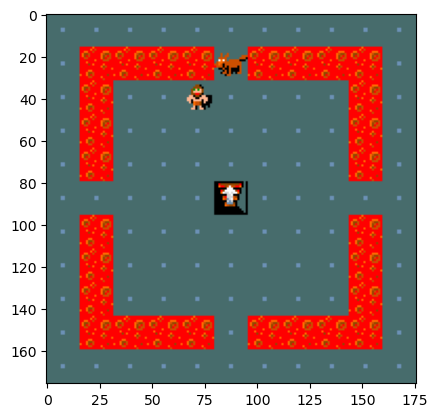

The 5 best paths calculated by strategy v2 are:
[(7, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 3
[(7, 38), (8, 38), (9, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 6
[(7, 38), (7, 37), (8, 36), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 11
[(7, 38), (8, 38), (9, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 11
[(7, 38), (8, 37), (7, 38), (6, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)] 20
Actual path choosed: [(7, 38), (8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)]
(7, 38) --> (8, 37)


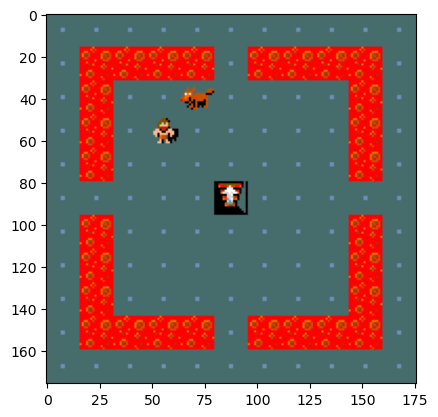

The 5 best paths calculated by strategy v2 are:
[(8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 2
[(8, 37), (9, 38), (10, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 6
[(8, 37), (9, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 10
[(8, 37), (9, 38), (10, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 11
[(8, 37), (9, 38), (10, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 11
Actual path choosed: [(8, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)]
(8, 37) --> (9, 36)


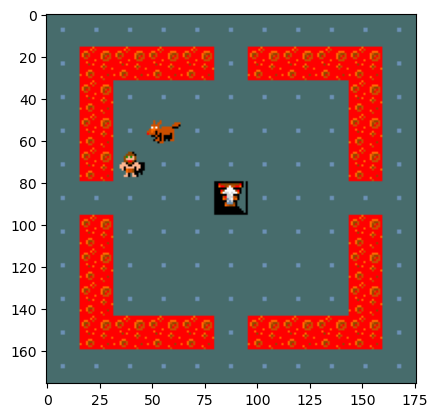

The 5 best paths calculated by strategy v2 are:
[(9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 0
[(9, 36), (10, 37), (11, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 10
[(9, 36), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 19
[(9, 36), (10, 37), (9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 20
[(9, 36), (10, 37), (10, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)] 20
Found a 100/100 safe path: [(9, 36), (10, 35), (9, 34), (8, 34), (7, 34), (6, 34), (5, 34)]


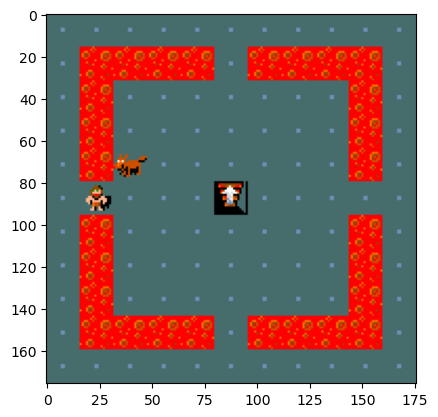

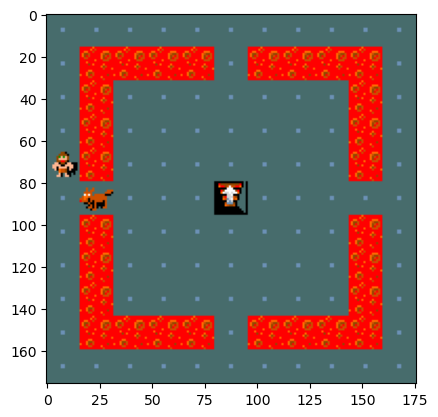

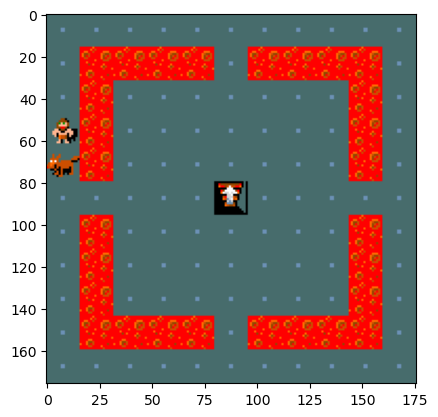

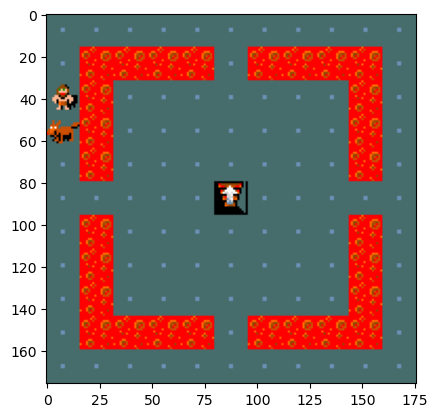

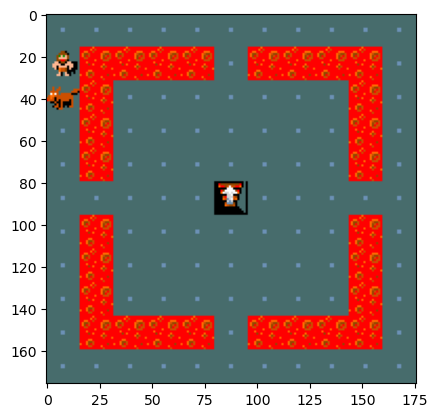

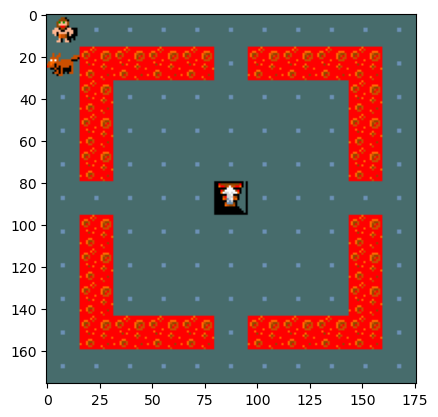

Target reached!


In [7]:
i = 0

while(1):
    CharacterPosition = MapGame.get_player_location()
    MonsterPositions = MapGame.get_monsters_location()

    if CharacterPosition==StrategyLogic.ActualGoal:
        print("Target reached!")
        break

    else:
        path, risk = StrategyLogic.Calculate(CharacterPosition, MonsterPositions,45, "v2", i)
        if risk==0:
            path = StrategyLogic.GetActualPath()
            print(f"Found a 100/100 safe path: {path}")
            for nextstep in path[1:]:
                NewState = Joystick.Move(CharacterPosition, nextstep)
                MapGame = Map(NewState)
                MapGame.view_map()
                CharacterPosition = MapGame.get_player_location()
        else:
            NextStep = path[1] 
            print(f"Actual path choosed: {StrategyLogic.GetActualPath()}")
            print(f"{CharacterPosition} --> {NextStep}")
            NewState = Joystick.Move(CharacterPosition, NextStep)
            MapGame = Map(NewState)
            MapGame.view_map()
    i += 1
